In [30]:
# Library
library(igraph)
library('entropy')

# Functions

In [28]:
# Create Graph Functions
createNetwork = function(ego.label) {
    graph <- read.graph(paste("./gplus/", ego.label, ".edges", sep=""), 
                        format="ncol", directed=TRUE) %>%
            add.vertices(nv=1, name=ego.label)
    print(length(E(graph)))
    len <- length(V(graph))-1
    ego.id <- len + 1
    edges_to_add <- unlist(mapply(c, rep(ego.id, len), seq(1, len), SIMPLIFY=FALSE))
    graph <- add.edges(graph, edges_to_add)
    print(length(E(graph)))
    return (graph)
}

In [8]:
# Question 18

file_list = dir('gplus',pattern = ".circles")
cat("Total Number of ALL Ego Network",length(file_list),"\n")

count_circle_network = 0
for (file in file_list) {
    cirle_num = length(readLines(paste("./gplus/", file, sep="")))
    if (cirle_num > 2){
        count_circle_network = count_circle_network +1
    }
}
cat("Number of Ego Network with >2 cirles",count_circle_network,"\n")


Total Number of ALL Ego Network 132 
Number of Ego Network with >2 cirles 57 


+ 774/774 vertices, named, from d3b5226:
  [1] 116096593129291787950 115577452448858888206 111043231112598324646
  [4] 101912622731674994296 103007541030633019633 100503825046812729376
  [7] 107223200089245371832 117501856089366372195 101739308033326906778
 [10] 107034427185919280374 101083462264043727631 106427338330235124106
 [13] 106065575905643219484 111427375067365088423 107254016305238640938
 [16] 111144359735228995726 108388913117648738704 106908353047290463285
 [19] 100385978647440361985 108275634427168524269 103715739238794996917
 [22] 103769346848998898948 105579962099557805816 118398504470807896139
 [25] 113000071431138202574 105690580176603415513 115063434129506153403
 [28] 104987491168318275668 110404981366805277423 108072425721964560978
+ ... omitted several vertices


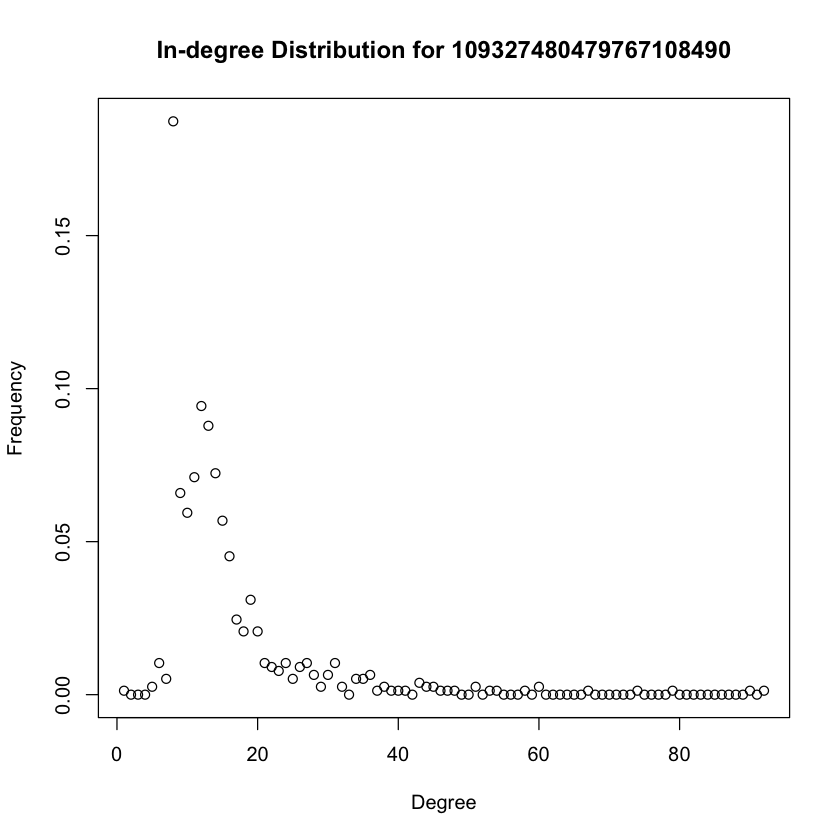

+ 924/924 vertices, named, from 50beaa7:
  [1] 103097292599617845552 115622466243011136115 112523501023209984910
  [4] 105181601937151625687 109921047456971058688 110462165105600557963
  [7] 106393478695568433143 102516642867599611430 101140265103198540659
 [10] 106340250101574147656 102313269957622329301 101793532287583914396
 [13] 101334168998537850167 117809915756820387908 111092625654641205891
 [16] 116998919420222099813 102872329895197895370 105985590137033288017
 [19] 110028909031632399683 113293422556039177805 105390077271236874234
 [22] 116665417191671711571 116706588382945742404 111208794732962408836
 [25] 117596712775912423303 102533732658641069172 102885069450694226482
 [28] 114776626159833751301 113463211235748178311 114073071270557336061
+ ... omitted several vertices


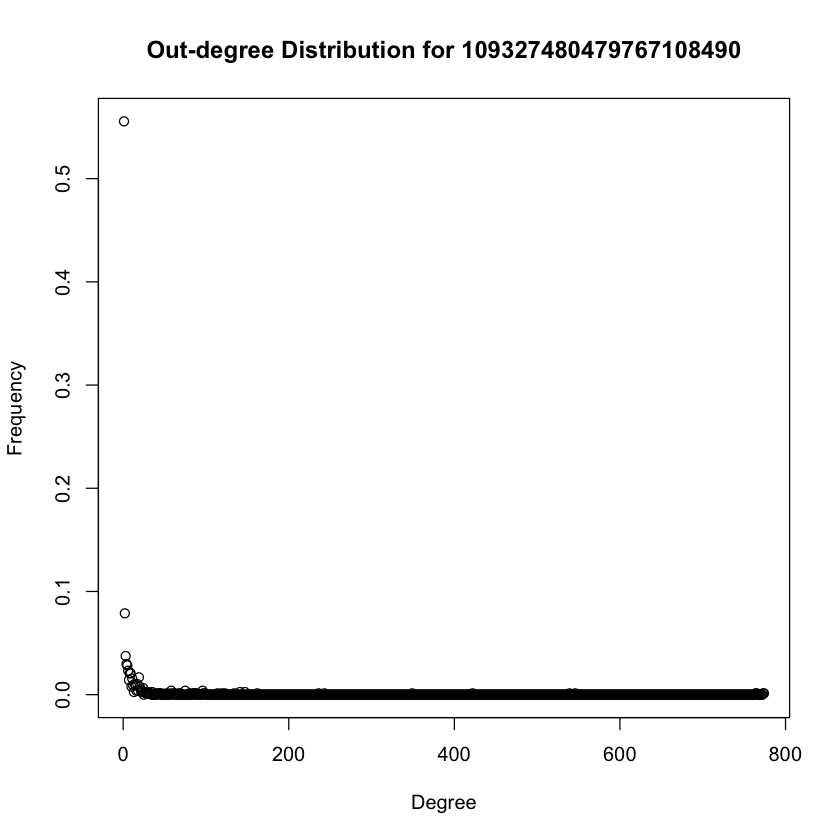

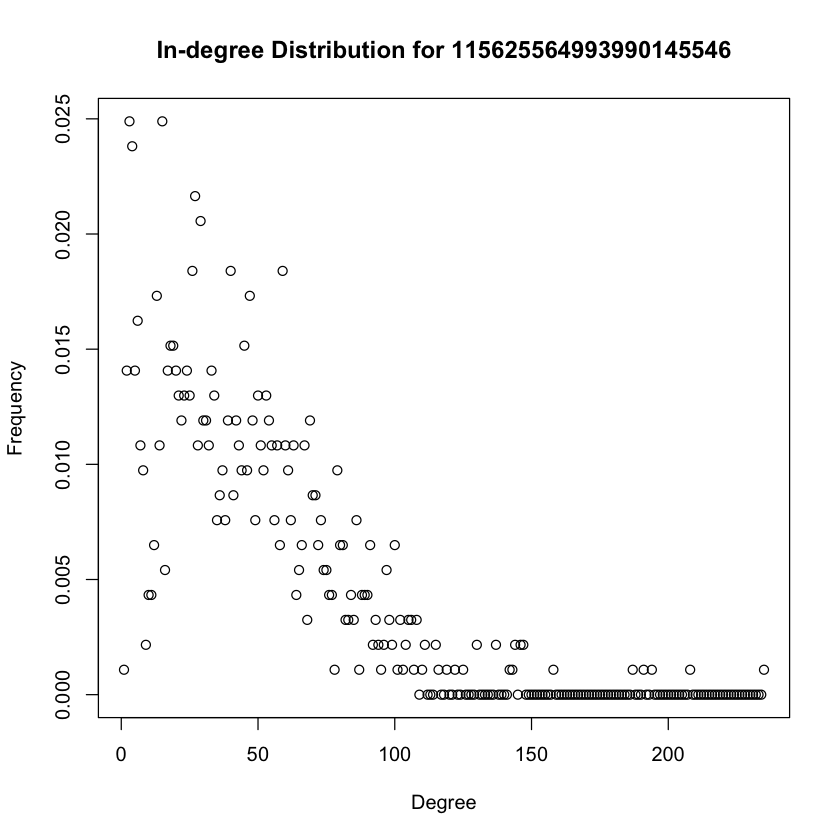

+ 3815/3815 vertices, named, from ebc4f64:
   [1] 101889975950768622316 107525778405784831972 104368271871465574510
   [4] 108634998661481918916 113184091727451211493 107297378329620440295
   [7] 105629715514672156567 100580349003099136931 104866519156997639676
  [10] 109285121542513818964 110717004259802576923 112794570546887000169
  [13] 105660089938320345564 103986857822813239790 109734652639820618180
  [16] 105663154402166276187 109752393704998577721 108629717769018996477
  [19] 118172083235049414213 102672374688772458990 110677236841289345722
  [22] 112910491493894368148 111014450734921332152 110156725901074535078
  [25] 102961518701176290926 109123727761757726835 103109624647973741694
  [28] 107299322418106180108 100371901134822196233 110049339086373069304
+ ... omitted several vertices


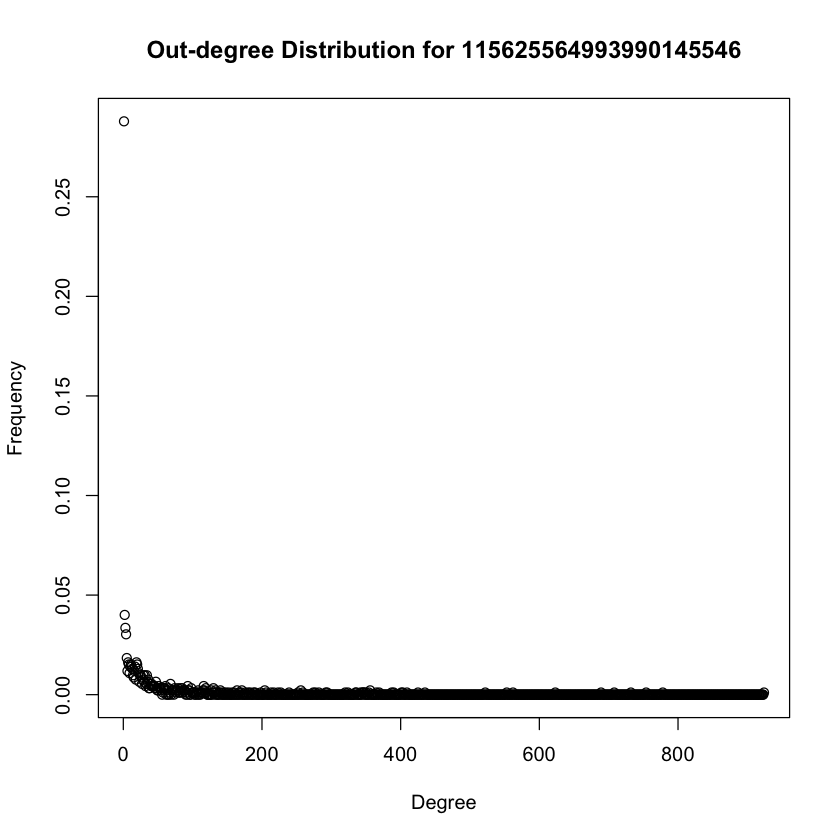

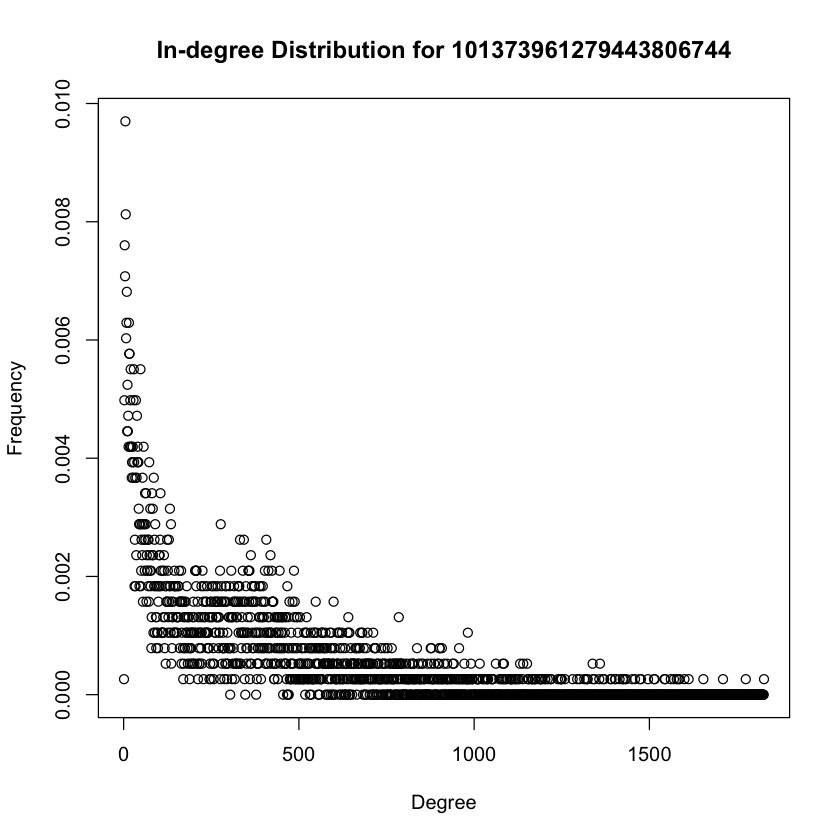

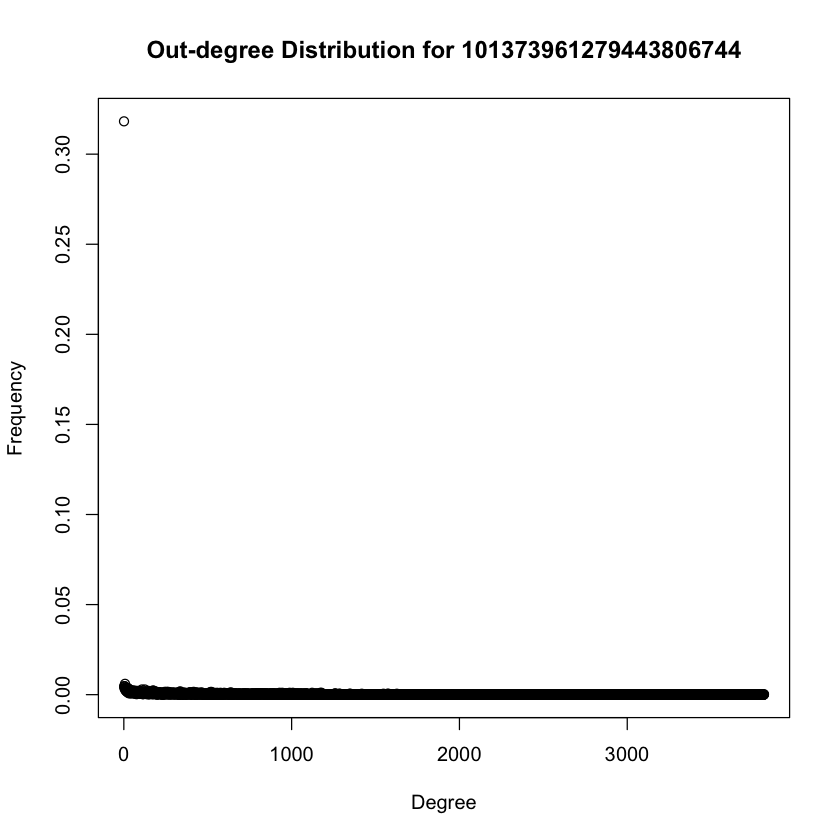

In [22]:
# Question 19

# Create Graph with Selected-id
selected_ids <- c('109327480479767108490', '115625564993990145546', '101373961279443806744')
networks <- vector(mode="list", length=3)
for (i in c(1,2,3)) {
    networks[[i]] <- createNetwork(selected_ids[i])
    plot(degree.distribution(networks[[i]], mode="in"), 
         main=paste("In-degree Distribution for", selected_ids[i]),
         xlab="Degree", ylab="Frequency")
    plot(degree.distribution(networks[[i]], mode="out"),
         main=paste("Out-degree Distribution for", selected_ids[i]),
         xlab="Degree", ylab="Frequency")
}


[1] "The Modularity for 109327480479767108490 is 0.252765387296677"


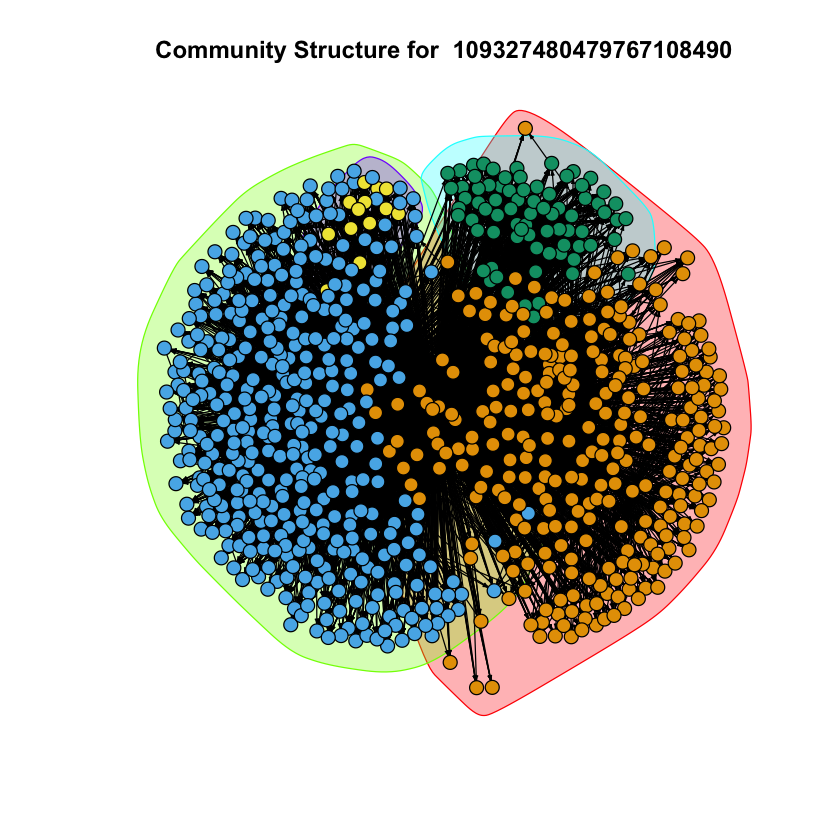

In [19]:
# Question20 Modularity Scores and Community Plots
for(i in 1) {
    graph <- networks[[1]]
    community <- cluster_walktrap(graph)
    graph.modularity = modularity(community)
    print(paste("The Modularity for", selected_ids[i], "is", graph.modularity))
    plot(community, graph, edge.color = "black",vertex.label=NA, 
         vertex.size=5, edge.arrow.size=.2,
         main=paste("Community Structure for ", selected_ids[i]))
}

In [31]:
circle_list = function(selected_id) {
    
    # Read Circles from .circles file
    circleFile <- scan(file=paste("./gplus/", selected_id, ".circles",sep=""), what="", sep="\n");
    circles <- strsplit(circleFile, "[[:space:]]+");
    names(circles) <- sapply(circles, function(x) x[[1]])
    circles <- lapply(circles, function(x) x[-1])
    return (circles)
}

In [51]:
for circle in circle_list('109327480479767108490'){
    entropy(as.numeric(circle))
}


ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: for circle
        ^


In [56]:
circle_list('109327480479767108490')

$GpWY5xaC4pg
  [1] "113795778261227599712" "105566970141355652049" "105470153246372228045"
  [4] "108900531664537360582" "105874778076913470108" "117700331770171427577"
  [7] "113679091104569847886" "100327156213335048919" "101169459095431717608"
 [10] "102510418958375940310" "106220237400987911414" "104467260489358886448"
 [13] "106922749586772073195" "106861733521077861664" "102753115592607020982"
 [16] "110048761915313561458" "118258618678422496074" "112433167110291438426"
 [19] "103715739238794996917" "100503825046812729376" "102787850184820917840"
 [22] "105473787356869556481" "101560853443212199687" "104325067584851948777"
 [25] "113291489641972241889" "112099950938836740503" "117908051426654942132"
 [28] "108208568989146048850" "118211704670730675838" "104569341456857245757"
 [31] "113258790329052123704" "112073635601345120001" "102651414949756989886"
 [34] "115768876040856451123" "117095998507271719738" "117587274800060720426"
 [37] "105003305448483151552" "110771101665440083128" "100273822651501829097"
 [40] "113267547594012614411" "101224855369187428276" "101863325514143382794"
 [43] "115141557210009517654" "102305504037241979419" "105421109308141427267"
 [46] "100167810185256491585" "107513575722133116990" "117600041356567628988"
 [49] "101566308230369300089" "106974335150938134688" "116899029375914044550"
 [52] "100811277459422087885" "114151454762980012752" "112996770034974789763"
 [55] "113527162831486426721" "116966155342153647496" "112072673743650889057"
 [58] "107826363002565568678" "113103756735658388419" "114880196283824607943"
 [61] "116399523097380978303" "105323161489126983657" "106574186796226027966"
 [64] "102632674885623415278" "114290117202733173036" "103549881794111968355"
 [67] "105579962099557805816" "106587414078896154702" "109252312083938502340"
 [70] "111626241908021736513" "100134929679100329171" "104292365751392505104"
 [73] "114338616913567703719" "105686412457331974656" "103357938121265157342"
 [76] "112530386790973552708" "114586103801769699361" "112949289750199509638"
 [79] "104494711981429457289" "108404515213153345305" "117800097181292130905"
 [82] "104624318685712679364" "103948342097780124824" "108229861312118010569"
 [85] "101399057455678796387" "108728748729739042019" "114801184188070515560"
 [88] "107188080561309681193" "114067604547724719316" "105546834124867793546"
 [91] "115989228352282435983" "115061395390469360477" "107165946846145779242"
 [94] "110268500576744850549" "114240951275429856694" "117404235181972026346"
 [97] "101232930838582270438" "105302919695732879579" "107861693770387399121"
[100] "104474597920129924602" "108812050702397236574" "117909914824127303156"
[103] "113456513261368355877" "111349444249397924863" "112906018431921155468"
[106] "111180029607068843657" "106749926655265456368" "100977642314507860229"
[109] "115118330101258973205" "110587955497525318489" "115569152877066441215"
[112] "102217649890683077643" "103996506156176606590" "110895426189381983174"
[115] "108233511690588379746" "100417599118664167049" "105048213377148116758"
[118] "105716926354929277930" "108550397775080610315" "103583604759580854844"
[121] "117631110100439879352" "108285296632855004171" "109093859371596367790"
[124] "115146916942363178595" "104772045073519492155" "116050306563863205442"
[127] "117634026274450034442" "104642707570846937989" "102163340143270457880"
[130] "104372763033946992769" "106319724555471671172" "114576118096974149275"
[133] "111529972228359871134" "108632173798001200791" "110990615239888482295"
[136] "109549697063674207897" "105567998076069312740" "116123675400340502994"
[139] "114348820641187937167" "106666583441331230789" "117514346599299151195"
[142] "100409612828771384099" "112829521495919737876" "117254023984524489199"
[145] "113031445893513641748" "109416195837678717077" "103554761683360090676"
[148] "102507873775182694401" "107103151271068732064" "114747592049319270534"
[151] "114307745595094829670" "109400767849888272765" "108713664318146843354"
[154] "10

In [61]:
library(infotheo)
condentropy(as.numeric(cluster_walktrap(graph)[1]),
            as.numeric(circle_list('109327480479767108490')$GpWY5xaC4pg))


Attaching package: ‘infotheo’

The following objects are masked from ‘package:entropy’:

    discretize, entropy



ERROR: Error in data.frame(Y, X): (list) object cannot be coerced to type 'double'
